In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Splitting Data
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

#For figuring out hyperparameters
from sklearn.model_selection import GridSearchCV

#Preprocessing tools
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Models Applied
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

#To assess accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Q1. Housing Price (SVM/SVC)

#### Load and Explore the Data

*   Think about standardizing the data.

*  How would you replace discrete attributes


In [ ]:
#I uploaded the csv file on my google drive and am using this to download from there
!gdown 1VYDXQ2naPQlXR2ZHRhYVvTjTZYbD--8U

Downloading...
From: https://drive.google.com/uc?id=1VYDXQ2naPQlXR2ZHRhYVvTjTZYbD--8U
To: /content/lab3_data.csv
100% 2.67k/2.67k [00:00<00:00, 4.44MB/s]


In [ ]:
#Importing Dataset
df = pd.read_csv("lab3_data.csv", delimiter = ',')
df.head()

,area,land,year,price,bldtype
0,2607,1200,2010,825000.0,0
1,1950,1783,1899,1685000.0,0
2,2520,1875,1899,1100000.0,0
3,3750,3125,1931,1200000.0,1
4,7812,5021,1908,1900000.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     94 non-null     int64  
 1   land     94 non-null     int64  
 2   year     94 non-null     int64  
 3   price    94 non-null     float64
 4   bldtype  94 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.8 KB


In [ ]:
#How many data points of each class are present
df.bldtype.value_counts()

0    58
1    36
Name: bldtype, dtype: int64

In [ ]:
#Let's see if there might be any outliers
df.describe()

,area,land,year,price,bldtype
count,94.000000,94.000000,94.000000,9.400000e+01,94.000000
mean,8592.468085,4095.968085,1918.031915,2.812458e+06,0.382979
std,21126.893599,6433.094494,41.425267,1.705404e+06,0.488720
min,680.000000,340.000000,1829.000000,1.399280e+05,0.000000
25%,2585.000000,1455.000000,1899.000000,1.500000e+06,0.000000
50%,3389.000000,2021.500000,1903.000000,2.725000e+06,0.000000
75%,5177.250000,3646.500000,1931.000000,3.563750e+06,1.000000
max,159457.000000,45767.000000,2010.000000,7.830000e+06,1.000000


Text(0.5, 1.0, 'price')

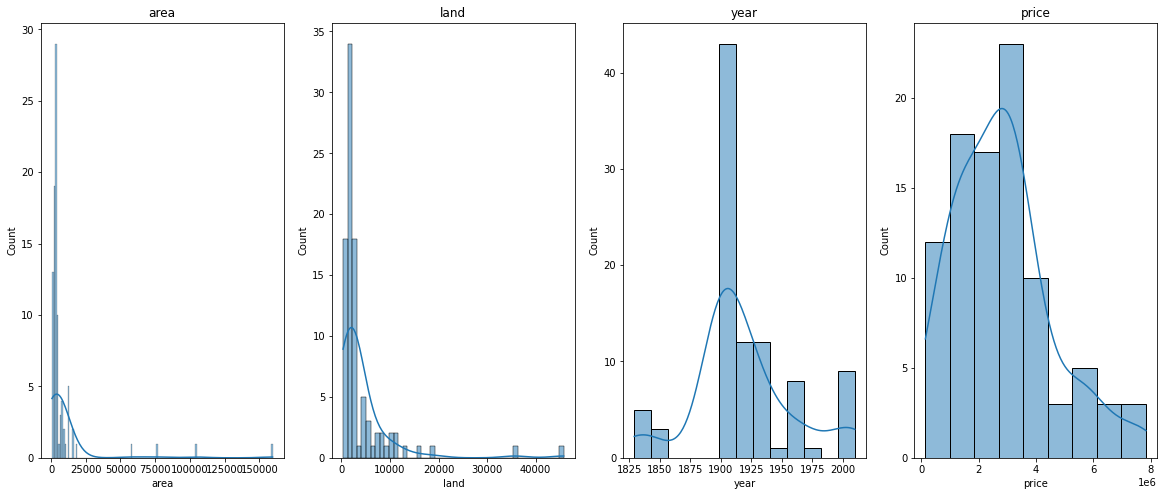

In [ ]:
#Plotting Distributions
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20,8))
sns.histplot(df.area, kde=True, ax = ax[0])
ax[0].set_title('area')
sns.histplot(df.land, kde=True, ax = ax[1])
ax[1].set_title('land')
sns.histplot(df.year, kde=True, ax = ax[2])
ax[2].set_title('year')
sns.histplot(df.price, kde=True, ax = ax[3])
ax[3].set_title('price')

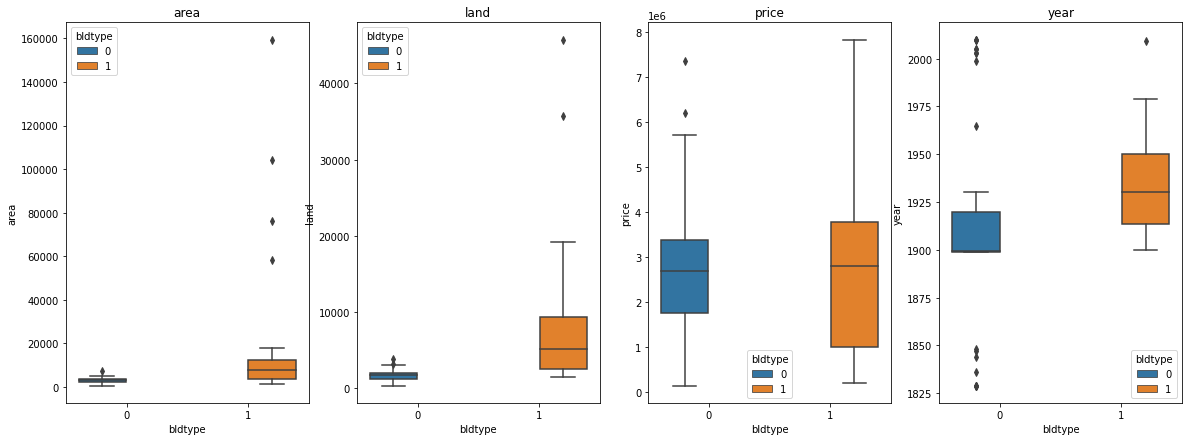

In [ ]:
#Boxplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,7))

sns.boxplot(data=df, x='bldtype', y='area', hue='bldtype', ax=ax[0])
ax[0].set_title("area")
sns.boxplot(data=df, x='bldtype', y='land', hue='bldtype', ax=ax[1])
ax[1].set_title("land")
sns.boxplot(data=df, x='bldtype', y='price', hue='bldtype', ax=ax[2])
ax[2].set_title("price")
sns.boxplot(data=df, x='bldtype', y='year', hue='bldtype', ax=ax[3])
ax[3].set_title("year")
plt.show()

In [ ]:
#There are outliers present in area and land.
df.quantile([0.5, 0.75, 0.8, 0.9, 0.95, 1])

,area,land,year,price,bldtype
0.50,3389.00,2021.5,1903.0,2725000.0,0.0
0.75,5177.25,3646.5,1931.0,3563750.0,1.0
0.80,7440.00,4950.8,1942.0,3795000.0,1.0
0.90,12164.00,8934.4,1975.4,5412500.0,1.0
0.95,16766.65,11800.0,2005.0,6154500.0,1.0
1.00,159457.00,45767.0,2010.0,7830000.0,1.0


So we definitely see some outliers in land and area. We'll cap these outliers at the value present at 95th percentile.

In [ ]:
df.loc[df.land>11800, 'land'] = 11800.0
df.loc[df.area>16766.5, 'area'] = 16766.5

Text(0.5, 1.0, 'price')

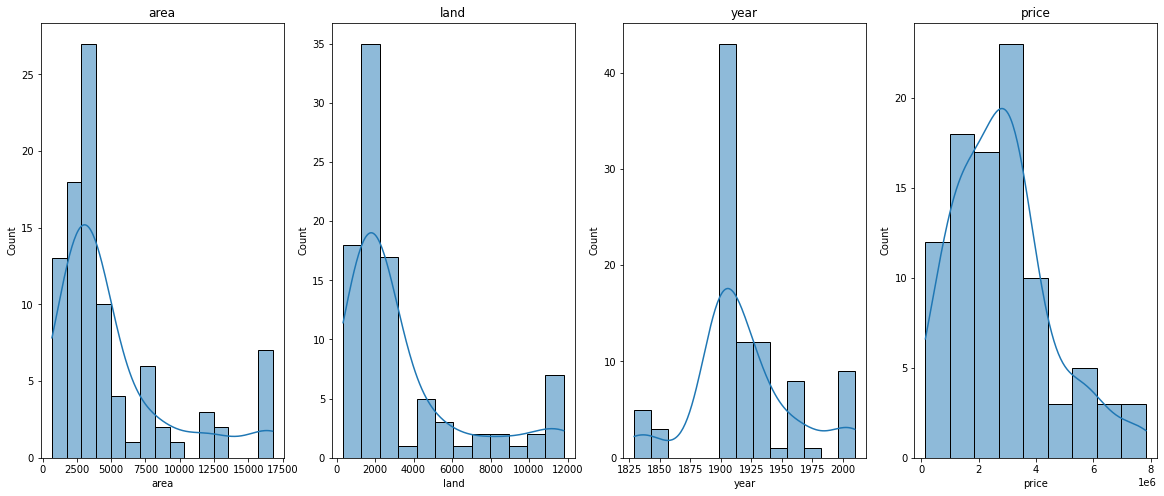

In [ ]:
#Plotting Distributions
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (20,8))
sns.histplot(df.area, kde=True, ax = ax[0])
ax[0].set_title('area')
sns.histplot(df.land, kde=True, ax = ax[1])
ax[1].set_title('land')
sns.histplot(df.year, kde=True, ax = ax[2])
ax[2].set_title('year')
sns.histplot(df.price, kde=True, ax = ax[3])
ax[3].set_title('price')

Our data looks good now

#### Train-Test Splot 80/20

I tried binning quantitative variables then doing a stratified split on them. But the data is too small for me to do that.

'year' is an ordinal variable. It's already in numerical form and while I can apply ordinal encoder, the numerical values already have an inherent order present to them. Let's say I do apply ordinal encoder, but then the values between 1850 to 1990 are missing from the data and that gap doesn't get accounted for in that encoding. That's why I decided to use year as it is.

In [ ]:
#Stratified Shuffle Split on bldtype
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['bldtype']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [ ]:
X_train = train.drop('bldtype', axis=1)
y_train = train['bldtype']
X_test = test.drop('bldtype', axis=1)
y_test = test['bldtype']

#### Train a linear model with soft margin



*   Try with initial value of C=1



In [ ]:
u, s, v = np.linalg.svd(X_train)

In [ ]:
np.set_printoptions(suppress=True)
print(np.round(s, 2))

[28851641.22    44435.53    12944.92     7721.16]


**Learnings from ML Theory**: Though there are limited features, but it's still worth checking the singular values. If there's a heavy drop in singular values or some singular values are close to 0 then it indicates dependent vectors, or rather, dependent features in our data.

In [ ]:
#Pipeline to incorporate Scaling and then Support Vector Classifier
#I've done this to explore different features of sklearn and to get familiar with the idea of pipelining

pipeline = Pipeline(steps = [
    ('scaling', StandardScaler()),
     ('model', SVC(kernel='linear', C=1))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', SVC(C=1, kernel='linear'))])

In [ ]:
#Training Data
svc_normal_cr_train = classification_report(y_train, pipeline.predict(X_train))
svc_normal_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
svc_normal_cr_test = classification_report(y_test, pipeline.predict(X_test))
svc_normal_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

#Evaluation has been mentioned at the end for comparison

#### Use cross validation to find best value of C



*   Can do it manually or use GridSearchCV

*   Divide the training set into train+validation



In [ ]:
#First I checked values from 1 to 10. The optimum C was at 1. Then I narrowed down the range
param_grid = {'model__C':np.linspace(0.8, 1)}
gs = GridSearchCV(estimator = pipeline,
             param_grid = param_grid, 
             verbose=3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ......................model__C=0.8;, score=0.933 total time=   0.0s
[CV 2/5] END ......................model__C=0.8;, score=1.000 total time=   0.0s
[CV 3/5] END ......................model__C=0.8;, score=0.933 total time=   0.0s
[CV 4/5] END ......................model__C=0.8;, score=0.867 total time=   0.0s
[CV 5/5] END ......................model__C=0.8;, score=0.933 total time=   0.0s
[CV 1/5] END .......model__C=0.8040816326530613;, score=0.933 total time=   0.0s
[CV 2/5] END .......model__C=0.8040816326530613;, score=1.000 total time=   0.0s
[CV 3/5] END .......model__C=0.8040816326530613;, score=0.933 total time=   0.0s
[CV 4/5] END .......model__C=0.8040816326530613;, score=0.867 total time=   0.0s
[CV 5/5] END .......model__C=0.8040816326530613;, score=0.933 total time=   0.0s
[CV 1/5] END .......model__C=0.8081632653061225;, score=0.933 total time=   0.0s
[CV 2/5] END .......model__C=0.8081632653061225

GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('model', SVC(C=1, kernel='linear'))]),
             param_grid={'model__C': array([0.8       , 0.80408163, 0.80816327, 0.8122449 , 0.81632653,
       0.82040816, 0.8244898 , 0.82857143, 0.83265306, 0.83673469,
       0.84081633, 0.84489796, 0.84897959, 0.85306122, 0.85714286,
       0.86122449, 0.86530612, 0.86938776, 0.87346939, 0.87755102,
       0.88163265, 0.88571429, 0.88979592, 0.89387755, 0.89795918,
       0.90204082, 0.90612245, 0.91020408, 0.91428571, 0.91836735,
       0.92244898, 0.92653061, 0.93061224, 0.93469388, 0.93877551,
       0.94285714, 0.94693878, 0.95102041, 0.95510204, 0.95918367,
       0.96326531, 0.96734694, 0.97142857, 0.9755102 , 0.97959184,
       0.98367347, 0.9877551 , 0.99183673, 0.99591837, 1.        ])},
             verbose=3)

In [ ]:
gs.best_params_

{'model__C': 0.9551020408163265}

In [ ]:
#Fitting our pipeline with the best 'C'
pipeline = Pipeline(steps = [
    ('scaling', StandardScaler()),
     ('model', SVC(kernel='linear', C=0.9551020408163265))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', SVC(C=0.9551020408163265, kernel='linear'))])

#### Analyse accuracy basis the new values you have computed

In [ ]:
#Training Data
svc_C_cr_train = classification_report(y_train, pipeline.predict(X_train))
svc_C_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
svc_C_cr_test = classification_report(y_test, pipeline.predict(X_test))
svc_C_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(['With C = 1', 'With C = 0.955'])

table.add_row(['-------Training-------']*2)
table.add_row([svc_normal_cr_train, svc_C_cr_train])
table.add_row(['-------Test------']*2)
table.add_row([svc_normal_cr_test, svc_C_cr_test])

print(table)

+-------------------------------------------------------+-------------------------------------------------------+
|                       With C = 1                      |                     With C = 0.955                    |
+-------------------------------------------------------+-------------------------------------------------------+
|                 -------Training-------                |                 -------Training-------                |
|               precision    recall  f1-score   support |               precision    recall  f1-score   support |
|                                                       |                                                       |
|            0       0.92      1.00      0.96        46 |            0       0.92      1.00      0.96        46 |
|            1       1.00      0.86      0.93        29 |            1       1.00      0.86      0.93        29 |
|                                                       |                               

Text(69.0, 0.5, 'True Labels')

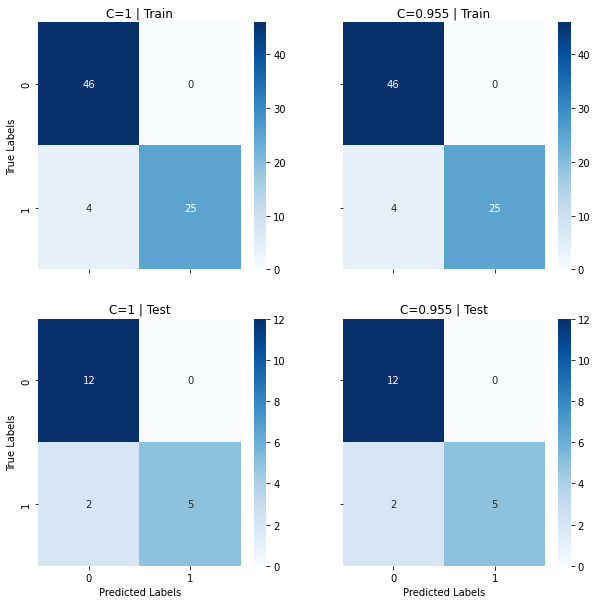

In [ ]:
#Confusion Matrices
fig, ax = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
cmap = 'Blues'
ax[0,0].set_title('C=1 | Train')
ax[0,1].set_title('C=0.955 | Train')
ax[1,0].set_title('C=1 | Test')
ax[1,1].set_title('C=0.955 | Test')
sns.heatmap(svc_normal_cm_train, annot=True, ax = ax[0,0], cmap=cmap)
sns.heatmap(svc_C_cm_train, annot=True, ax = ax[0,1], cmap=cmap)
sns.heatmap(svc_normal_cm_test, annot=True, ax = ax[1,0], cmap=cmap)
sns.heatmap(svc_C_cm_test, annot=True, ax = ax[1,1], cmap=cmap)

ax[1,0].set_xlabel('Predicted Labels')
ax[1,1].set_xlabel('Predicted Labels')
ax[0,0].set_ylabel('True Labels')
ax[1,0].set_ylabel('True Labels')

We don't see any difference in accuracy. The optimum value of 'C' came out to be close to 1, perhaps it could be because of that. 


Let's try plotting the data on a scatterplot and see our support vectors

In [ ]:
#Reducing data to 2 components for plotting
ARR = PCA(n_components = 2).fit_transform(X)

In [ ]:
model = SVC(kernel='linear', C=0.9551020408163265)
model.fit(ARR, y)

SVC(C=0.9551020408163265, kernel='linear')

In [ ]:
#Borrowed this function from the notebook shared on SVM, DT and Boosting
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

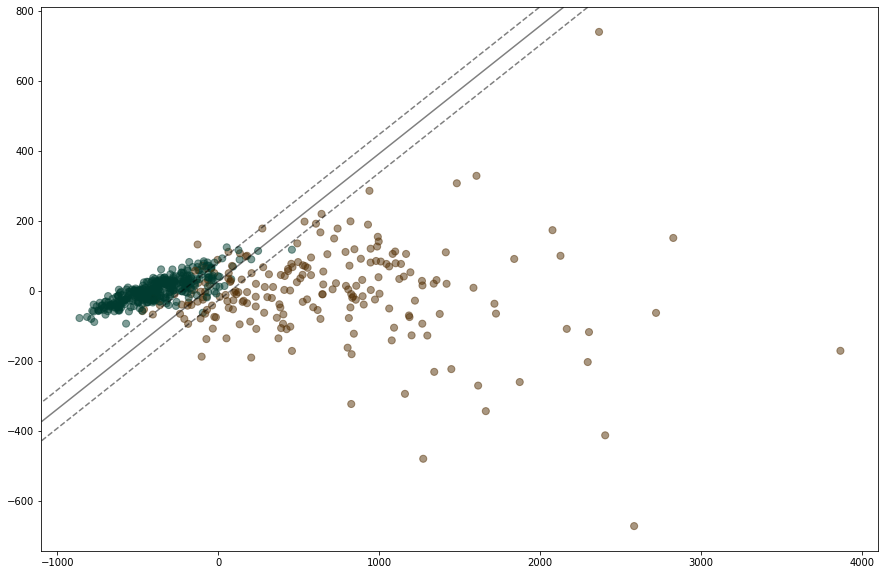

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(ARR[:, 0], ARR[:, 1], c=y, s=50, cmap='BrBG', alpha = 0.5)
plot_svc_decision_function(model)

Now we can see why C=0.955 is the optimal choice. We need softer margins because some overlap needs to be allowed as per the data.

## Q2. DT and RF

Consider the Wisconsin Breast Cancer dataset available from
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
(Diagnostic)

The dataset has 32 attributes that predict malignancy. There are a
total of 569 data patterns. Use 5-fold cross-validation. 


1.   Use Keras or any other framework to construct a decision tree from the training data and obtain the performance on the test data

2.   Construct a random forest (of say, 100 trees) from the training data and use the random forest to obtain the performance on the test data

3. Compare the performance you obtain in 1 and 2


In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df['target'] = data.target

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


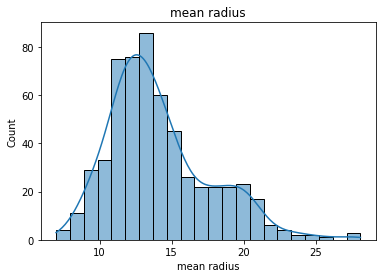

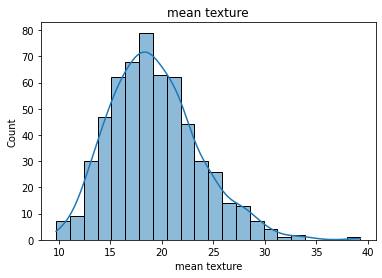

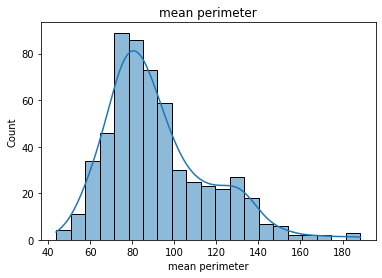

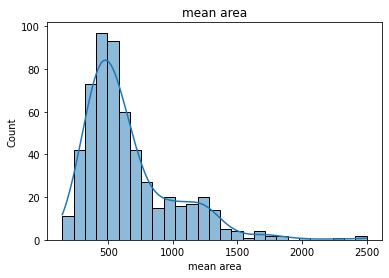

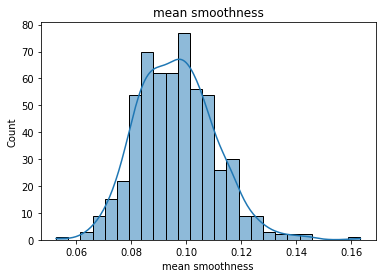

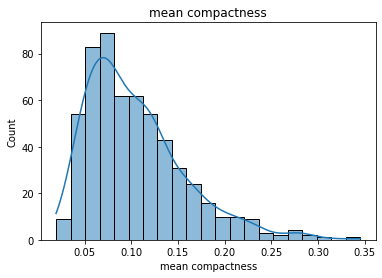

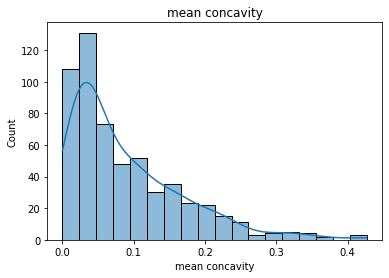

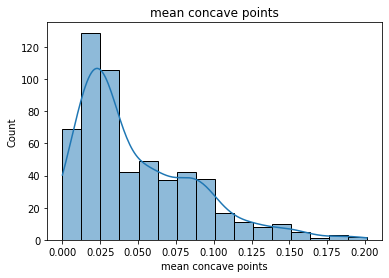

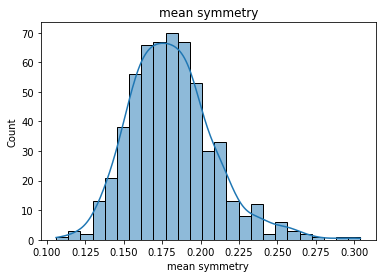

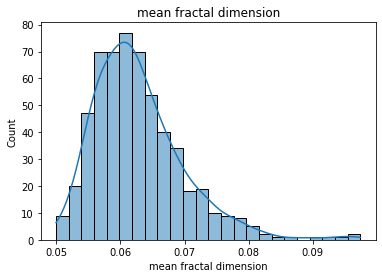

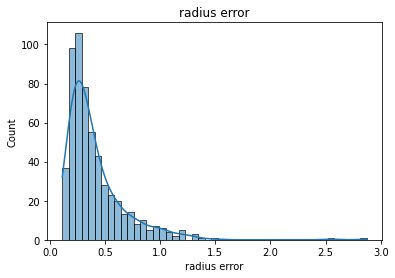

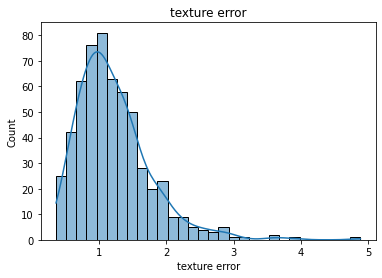

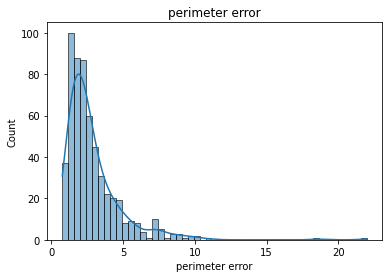

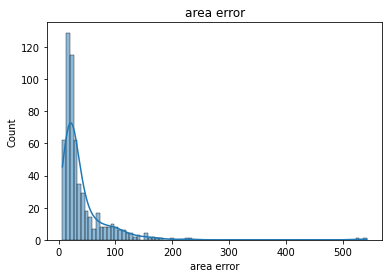

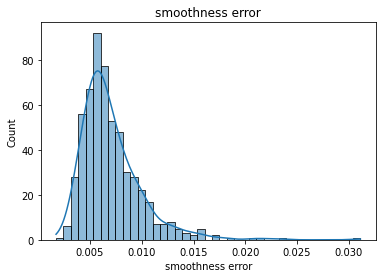

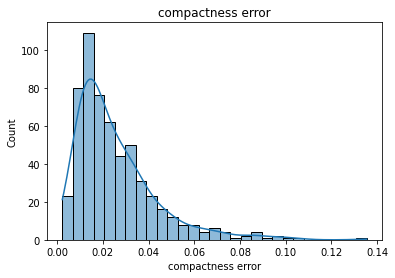

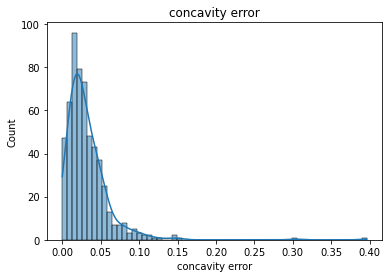

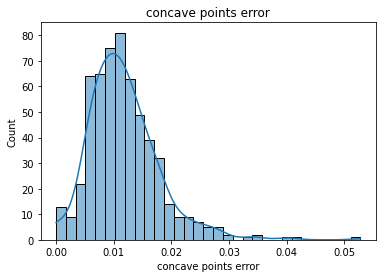

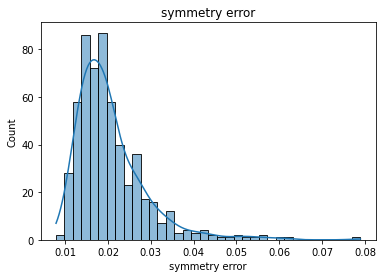

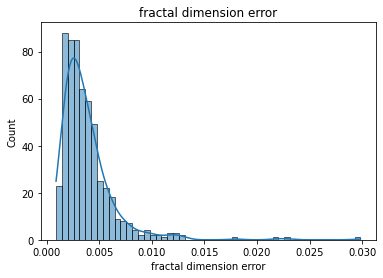

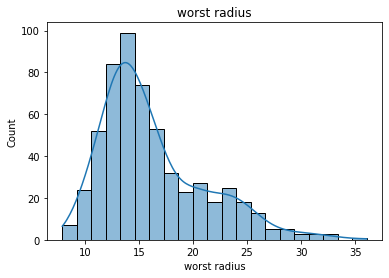

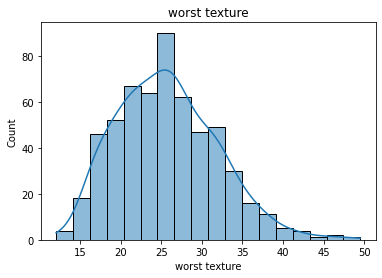

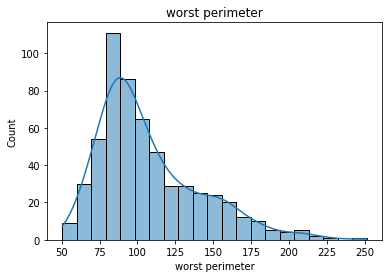

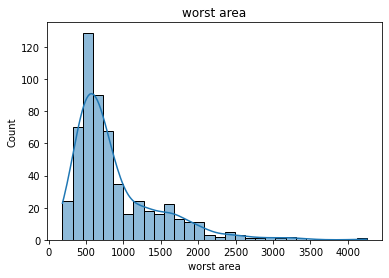

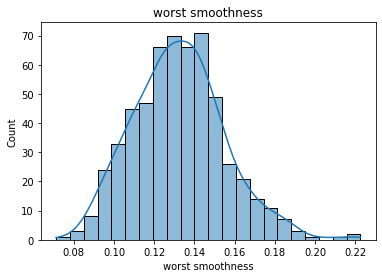

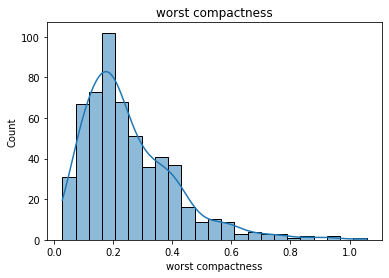

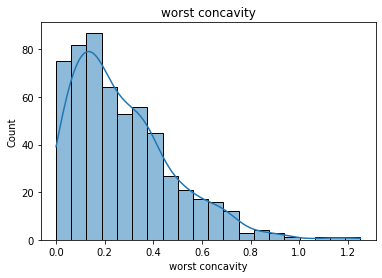

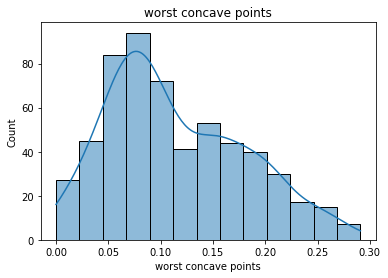

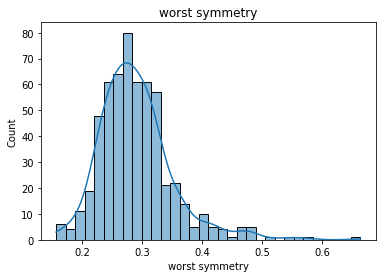

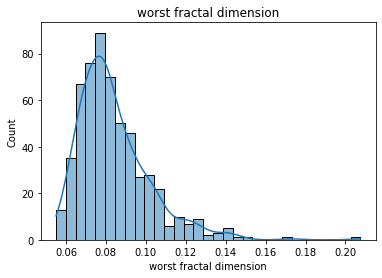

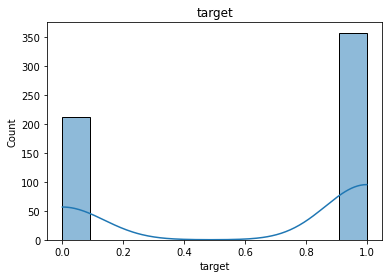

In [ ]:
#Checking Distributions
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

Numerical Variables seem to be normally distributed and data looks clean.

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [ ]:
#Stratified Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
u, s, v = np.linalg.svd(X_train)

In [ ]:
#Printing as a series for better readability
pd.Series(s)

0     27095.771950
1      2184.389490
2       775.146673
3       457.351711
4       140.124678
5        50.872246
6        29.158587
7        12.713476
8         8.422316
9         6.534618
10        4.069609
11        1.961340
12        1.292375
13        1.069612
14        0.781978
15        0.542490
16        0.437721
17        0.425357
18        0.298092
19        0.269349
20        0.185616
21        0.174385
22        0.127701
23        0.114261
24        0.088792
25        0.075873
26        0.050296
27        0.039586
28        0.030937
29        0.018941
dtype: float64

As we see here, most of the data is concentrated in top 7 of the singular values. We can take advantage of this and apply PCA on our data set to reduce the features from 29 to 7.

In [ ]:
pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', DecisionTreeClassifier())
])

In [ ]:
param_dict = {'model__criterion':['gini', 'entropy', 'log_loss'],
              'model__max_depth':[3,4,5,6,7]}
search = GridSearchCV(pipeline, param_dict, cv=5, scoring='accuracy', verbose=3)

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END model__criterion=gini, model__max_depth=3;, score=0.945 total time=   0.0s
[CV 2/5] END model__criterion=gini, model__max_depth=3;, score=0.945 total time=   0.0s
[CV 3/5] END model__criterion=gini, model__max_depth=3;, score=0.901 total time=   0.0s
[CV 4/5] END model__criterion=gini, model__max_depth=3;, score=0.912 total time=   0.0s
[CV 5/5] END model__criterion=gini, model__max_depth=3;, score=0.967 total time=   0.0s
[CV 1/5] END model__criterion=gini, model__max_depth=4;, score=0.923 total time=   0.0s
[CV 2/5] END model__criterion=gini, model__max_depth=4;, score=0.956 total time=   0.0s
[CV 3/5] END model__criterion=gini, model__max_depth=4;, score=0.912 total time=   0.0s
[CV 4/5] END model__criterion=gini, model__max_depth=4;, score=0.912 total time=   0.0s
[CV 5/5] END model__criterion=gini, model__max_depth=4;, score=0.956 total time=   0.0s
[CV 1/5] END model__criterion=gini, model__max_depth=5;, sc

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_cl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PCA', PCA(n_components=7)),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy', 'log_loss'],
                         'model__max_depth': [3, 4, 5, 6, 7]},
             scoring='accuracy', verbose=3)

In [ ]:
print('Best Estimator:', search.best_params_)

Best Estimator: {'model__criterion': 'entropy', 'model__max_depth': 6}


In [ ]:
pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', DecisionTreeClassifier(max_depth=4, criterion='entropy'))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [ ]:
y_pred_DT = pipeline.predict(X_test)

In [ ]:
#Training Data
DT_cr_train = classification_report(y_train, pipeline.predict(X_train))
DT_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
DT_cr_test = classification_report(y_test, pipeline.predict(X_test))
DT_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

#Will Compare the accuracy with random forest later on

In [ ]:
#Let's Implement Random Forest

pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', RandomForestClassifier(random_state=42))
])

In [ ]:
#I started off with more n_estimators but the range seemed closer to 50

param_dict = {'model__criterion':['gini', 'entropy'],
              'model__n_estimators':[45, 50, 55],
              'model__max_depth':[4,5,6,7]}

search = GridSearchCV(pipeline, param_dict, cv=5, scoring='accuracy', verbose=3)

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=45;, score=0.945 total time=   0.1s
[CV 2/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=45;, score=0.945 total time=   0.1s
[CV 3/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=45;, score=0.912 total time=   0.1s
[CV 4/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=45;, score=0.923 total time=   0.1s
[CV 5/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=45;, score=0.967 total time=   0.1s
[CV 1/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=50;, score=0.945 total time=   0.1s
[CV 2/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=50;, score=0.945 total time=   0.1s
[CV 3/5] END model__criterion=gini, model__max_depth=4, model__n_estimators=50;, score=0.912 total time=   0.1s
[CV 4/5] END model__criterion=gini, model_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PCA', PCA(n_components=7)),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [4, 5, 6, 7],
                         'model__n_estimators': [45, 50, 55]},
             scoring='accuracy', verbose=3)

In [ ]:
print('Best Estimator:', search.best_params_)

Best Estimator: {'model__criterion': 'entropy', 'model__max_depth': 7, 'model__n_estimators': 55}


In [ ]:
pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', RandomForestClassifier(criterion='entropy', max_depth=7,n_estimators=55,random_state=42))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        n_estimators=55, random_state=42))])

In [ ]:
y_pred_RF = pipeline.predict(X_test)

In [ ]:
#Training Data
RF_cr_train = classification_report(y_train, pipeline.predict(X_train))
RF_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
RF_cr_test = classification_report(y_test, pipeline.predict(X_test))
RF_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(['Decision Trees', 'Random Forest'])

table.add_row(['-------Training-------']*2)
table.add_row([DT_cr_train, RF_cr_train])
table.add_row(['-------Test------']*2)
table.add_row([DT_cr_test, RF_cr_test])

print(table)

+-------------------------------------------------------+-------------------------------------------------------+
|                     Decision Trees                    |                     Random Forest                     |
+-------------------------------------------------------+-------------------------------------------------------+
|                 -------Training-------                |                 -------Training-------                |
|               precision    recall  f1-score   support |               precision    recall  f1-score   support |
|                                                       |                                                       |
|            0       0.99      0.89      0.94       170 |            0       1.00      0.98      0.99       170 |
|            1       0.94      1.00      0.97       285 |            1       0.99      1.00      0.99       285 |
|                                                       |                               

Text(69.0, 0.5, 'True Labels')

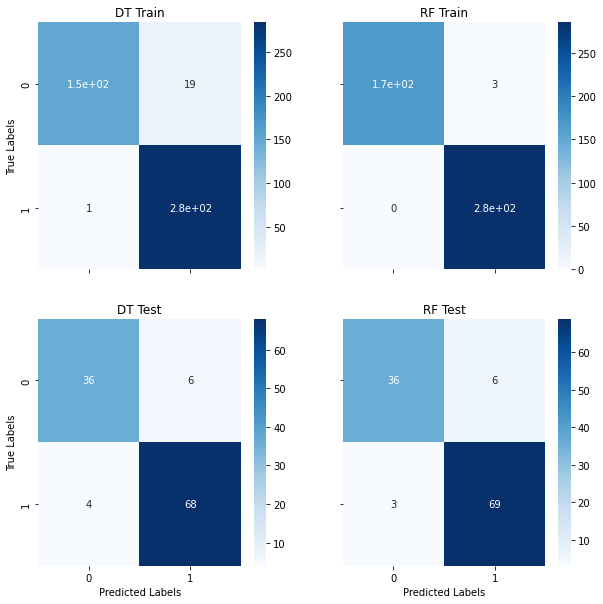

In [ ]:
#Confusion Matrices
fig, ax = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
cmap = 'Blues'
ax[0,0].set_title('DT Train')
ax[0,1].set_title('RF Train')
ax[1,0].set_title('DT Test')
ax[1,1].set_title('RF Test')
sns.heatmap(DT_cm_train, annot=True, ax = ax[0,0], cmap=cmap)
sns.heatmap(RF_cm_train, annot=True, ax = ax[0,1], cmap=cmap)
sns.heatmap(DT_cm_test, annot=True, ax = ax[1,0], cmap=cmap)
sns.heatmap(RF_cm_test, annot=True, ax = ax[1,1], cmap=cmap)

ax[1,0].set_xlabel('Predicted Labels')
ax[1,1].set_xlabel('Predicted Labels')
ax[0,0].set_ylabel('True Labels')
ax[1,0].set_ylabel('True Labels')

Random Forest performs better

####  Repeat the exercise but add ±10% noise to 25% of the data (Optional)

In [ ]:
#Adding noise to training data - Extracting 25% data points
train_data = X_train.copy()
train_data['target'] = y_train
noise_data = train_data.sample(int(0.25*len(X_train)), random_state=42)

In [ ]:
noise_target = noise_data['target']
noise_data = noise_data.drop('target', axis=1)

In [ ]:
#Creating normal distribution noise using mean and standard deviation from the data
np.random.seed(42)
noise = np.random.normal(noise_data.mean(), noise_data.std(), noise_data.shape)

In [ ]:
#Adding 10% Noise
noise_data=noise_data + 0.1*noise
noise_data['target'] = noise_target

In [ ]:
#Creating our DataFrame
df_noisy = pd.concat([train_data, noise_data], ignore_index=True)

In [ ]:
#We won't use our old X and y variables since we'll be using them for bagging, boosting later
X_noisy = df_noisy.drop('target', axis=1)
y_noisy = df_noisy['target']

In [ ]:
#We can still reduce our data to 7 components
pipeline_n = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', DecisionTreeClassifier(criterion = 'entropy'))
])

In [ ]:
pipeline_n.fit(X_noisy, y_noisy)

Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('model', DecisionTreeClassifier(criterion='entropy'))])

In [ ]:
#Training Data - denoised
noiseDT_cr_train = classification_report(y_train, pipeline.predict(X_train))
noiseDT_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
noiseDT_cr_test = classification_report(y_test, pipeline.predict(X_test))
noiseDT_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

#We'll Compare Later

### Boosting

Implement a boosting classifier algorithm for the same dataset as above (sample without noise)

Feel free to use any boosting algorithm you want

However only run the code for the eventual algorithm you choose and comment out every other algorithm

Briefly explain why you chose a particular algorithm

In [ ]:
#I'm using AdaBoost. This is the algorithm we studied in class, so I want to see how it performs practically.
pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', AdaBoostClassifier(algorithm='SAMME'))
])

In [ ]:
param_dict = {'model__base_estimator':[DecisionTreeClassifier(), SVC()],
              'model__learning_rate':[0.5, 1, 5, 10],
              'model__n_estimators':[25, 50, 75, 100, 150, 200]}

search = GridSearchCV(pipeline, param_dict, cv=5, scoring='accuracy', verbose=3)

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END model__base_estimator=DecisionTreeClassifier(), model__learning_rate=0.5, model__n_estimators=25;, score=0.945 total time=   0.0s
[CV 2/5] END model__base_estimator=DecisionTreeClassifier(), model__learning_rate=0.5, model__n_estimators=25;, score=0.901 total time=   0.0s
[CV 3/5] END model__base_estimator=DecisionTreeClassifier(), model__learning_rate=0.5, model__n_estimators=25;, score=0.901 total time=   0.0s
[CV 4/5] END model__base_estimator=DecisionTreeClassifier(), model__learning_rate=0.5, model__n_estimators=25;, score=0.901 total time=   0.0s
[CV 5/5] END model__base_estimator=DecisionTreeClassifier(), model__learning_rate=0.5, model__n_estimators=25;, score=0.956 total time=   0.0s
[CV 1/5] END model__base_estimator=DecisionTreeClassifier(), model__learning_rate=0.5, model__n_estimators=50;, score=0.945 total time=   0.0s
[CV 2/5] END model__base_estimator=DecisionTreeClassifier(), model__learning_rat

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=25;, score=0.374 total time=   0.1s
[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=25;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=25;, score=0.374 total time=   0.1s
[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=25;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=50;, score=0.374 total time=   0.1s
[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=50;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=50;, score=0.374 total time=   0.1s
[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=50;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=50;, score=0.374 total time=   0.1s
[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=75;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=75;, score=0.374 total time=   0.1s
[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=75;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=75;, score=0.374 total time=   0.1s
[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=75;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=100;, score=0.374 total time=   0.1s
[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=100;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=100;, score=0.374 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=100;, score=0.374 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=100;, score=0.374 total time=   0.3s
[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=150;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=150;, score=0.374 total time=   0.1s
[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=150;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=150;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=150;, score=0.374 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=200;, score=0.374 total time=   0.3s
[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=200;, score=0.374 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=200;, score=0.374 total time=   0.1s
[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=200;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=5, model__n_estimators=200;, score=0.374 total time=   0.1s
[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=25;, score=0.374 total time=   0.1s
[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=25;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=25;, score=0.374 total time=   0.1s
[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=25;, score=0.374 total time=   0.1s
[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=25;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=50;, score=0.374 total time=   0.1s
[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=50;, score=0.374 total time=   0.1s
[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=50;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=50;, score=0.374 total time=   0.1s
[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=50;, score=0.374 total time=   0.1s
[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=75;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=75;, score=0.374 total time=   0.1s
[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=75;, score=0.374 total time=   0.1s
[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=75;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=75;, score=0.374 total time=   0.1s
[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=100;, score=0.374 total time=   0.1s
[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=100;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=100;, score=0.374 total time=   0.1s
[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=100;, score=0.374 total time=   0.1s
[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=100;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=150;, score=0.374 total time=   0.1s
[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=150;, score=0.374 total time=   0.1s
[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=150;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=150;, score=0.374 total time=   0.1s
[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=150;, score=0.374 total time=   0.1s
[CV 1/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=200;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/li

[CV 2/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=200;, score=0.374 total time=   0.1s
[CV 3/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=200;, score=0.374 total time=   0.1s
[CV 4/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=200;, score=0.374 total time=   0.1s
[CV 5/5] END model__base_estimator=SVC(), model__learning_rate=10, model__n_estimators=200;, score=0.374 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 3, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PCA', PCA(n_components=7)),
                                       ('model',
                                        AdaBoostClassifier(algorithm='SAMME'))]),
             param_grid={'model__base_estimator': [DecisionTreeClassifier(),
                                                   SVC()],
                         'model__learning_rate': [0.5, 1, 5, 10],
                         'model__n_estimators': [25, 50, 75, 100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
print('Best Estimator:', search.best_params_)

Best Estimator: {'model__base_estimator': DecisionTreeClassifier(), 'model__learning_rate': 0.5, 'model__n_estimators': 50}


In [ ]:
pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=10, n_estimators=100, algorithm='SAMME'))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('model',
                 AdaBoostClassifier(algorithm='SAMME',
                                    base_estimator=DecisionTreeClassifier(),
                                    learning_rate=10, n_estimators=100))])

In [ ]:
#Training Data
AdaB_cr_train = classification_report(y_train, pipeline.predict(X_train))
AdaB_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
AdaB_cr_test = classification_report(y_test, pipeline.predict(X_test))
AdaB_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

#We'll Compare Later

### Bagging

Implement a bagging classifier on the RF you created above


> from sklearn.ensemble import BaggingClassifier

You will have to pass the DT into the Bagging Classifier

Once you have the y_pred for Bagging and RF, accurately compute the accuracy by computing the numpy sum where pred(bagging) == pred(RF) and divide by len(pred(bagging))

Please provide rationale behind why this is done.



In [ ]:
#Let's do bagging
pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', BaggingClassifier())
])

In [ ]:
param_dict = {'model__base_estimator':[DecisionTreeClassifier()],
              
              'model__n_estimators':[25, 50, 75, 100, 150, 200]}

search = GridSearchCV(pipeline, param_dict, cv=5, scoring='accuracy', verbose=3)

In [ ]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=25;, score=0.956 total time=   0.1s
[CV 2/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=25;, score=0.956 total time=   0.1s
[CV 3/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=25;, score=0.912 total time=   0.1s
[CV 4/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=25;, score=0.923 total time=   0.1s
[CV 5/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=25;, score=0.978 total time=   0.1s
[CV 1/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=50;, score=0.945 total time=   0.1s
[CV 2/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=50;, score=0.945 total time=   0.2s
[CV 3/5] END model__base_estimator=DecisionTreeClassifier(), model__n_estimators=50;, score=0.934 total time=   0.2s
[CV 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('PCA', PCA(n_components=7)),
                                       ('model', BaggingClassifier())]),
             param_grid={'model__base_estimator': [DecisionTreeClassifier()],
                         'model__n_estimators': [25, 50, 75, 100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
print('Best Estimator:', search.best_params_)

Best Estimator: {'model__base_estimator': DecisionTreeClassifier(), 'model__n_estimators': 150}


In [ ]:
pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   n_estimators=50))])

In [ ]:
y_pred_bag = pipeline.predict(X_test)

In [ ]:
#Training Data
Bagging_cr_train = classification_report(y_train, pipeline.predict(X_train))
Bagging_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
Bagging_cr_test = classification_report(y_test, pipeline.predict(X_test))
Bagging_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

#We'll Compare Later

Bonus : While you are looking at ensemble models, explore VotingClassifier

In [ ]:
#We'll use VotingClassifier on all the models we've created above

pipeline = Pipeline(steps = [
    ('PCA', PCA(n_components = 7)),
     ('model', VotingClassifier(estimators=[
         ('decision_trees', DecisionTreeClassifier(criterion='entropy')),
         ('random_forest', RandomForestClassifier(criterion='entropy', max_depth=6,n_estimators=50,random_state=42)),
         ('adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.5, n_estimators=50, algorithm='SAMME')),
         ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50))
     ]))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('PCA', PCA(n_components=7)),
                ('model',
                 VotingClassifier(estimators=[('decision_trees',
                                               DecisionTreeClassifier(criterion='entropy')),
                                              ('random_forest',
                                               RandomForestClassifier(criterion='entropy',
                                                                      max_depth=6,
                                                                      n_estimators=50,
                                                                      random_state=42)),
                                              ('adaboost',
                                               AdaBoostClassifier(algorithm='SAMME',
                                                                  base_estimator=DecisionTreeClassifier(),
                                                                  learning_rate=0.5)),
                  

In [ ]:
#Training Data
Voting_cr_train = classification_report(y_train, pipeline.predict(X_train))
Voting_cm_train = confusion_matrix(y_train, pipeline.predict(X_train))
#Test Data
Voting_cr_test = classification_report(y_test, pipeline.predict(X_test))
Voting_cm_test = confusion_matrix(y_test, pipeline.predict(X_test))

## Comparison

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(['Decision Trees', 'NoiseDT', 'Random Forest'])

table.add_row(['-------Training-------']*3)
table.add_row([DT_cr_train, noiseDT_cr_train, RF_cr_train])
table.add_row(['-------Test------']*3)
table.add_row([DT_cr_test,noiseDT_cr_test, RF_cr_test])

table2 = PrettyTable(['Bagging', 'AdaBoost', 'Voting'])

table2.add_row(['-------Training-------']*3)
table2.add_row([Bagging_cr_train, AdaB_cr_train, Voting_cr_train])
table2.add_row(['-------Test------']*3)
table2.add_row([Bagging_cr_test, AdaB_cr_test, Voting_cr_test])

print(table)
print(table2)

+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+
|                     Decision Trees                    |                        NoiseDT                        |                     Random Forest                     |
+-------------------------------------------------------+-------------------------------------------------------+-------------------------------------------------------+
|                 -------Training-------                |                 -------Training-------                |                 -------Training-------                |
|               precision    recall  f1-score   support |               precision    recall  f1-score   support |               precision    recall  f1-score   support |
|                                                       |                                                       |                                     

#### Observations
Decision trees generally have high varince - If you split training data randomly into two parts and fit decision trees on them, the results would be different. Bagging reduces that variance because it creates multiple samples from the existing dataset and fits decision trees on them, and then it aggregates the output.

Random Forest takes it one step further and improves upon bagging. Trees in random forest are more random, the feature to split on is chosen from a randomly chosen subset of features instead of all the features. The predictions from all the trees are, therefore, uncorrelated to eachother. 

Considering the accuracies of both training and test data above, We can see the performance of Bagging is better than Decision Tree, and performance of Random Forest is better than Bagging. Though the differences are minor because it's a toy dataset from sklearn and we can readily fit a model into it without any complications

Adding noise into our decision tree increased accuracy on training data, but slightly reduced accuracy on test data. The accuracy has been measured on actual training and test data, not the training data in which noise was added. Perhaps this could be because adding noise created from training data itself allowed the algorithm to learn it better and that resulted in a slight overfit, however, the rationale behind adding noise isn't entirely clear at this point.

Adaboost performed the worst, perhaps this could be overfitting too due to high learning rate and 100 samples. The accuracy on training data is 100%, though we selected our hyperparameters based on grid search but this could be a possibility.

Voting gives the best performance, ofcourse, because it's a combination of the rest of the created models.

In [ ]:
#Once you have the y_pred for Bagging and RF, accurately compute the accuracy by computing the numpy sum where pred(bagging) == pred(RF) and divide by len(pred(bagging))
np.sum(y_pred_bag[np.where(y_pred_bag == y_pred_RF)])/len(y_pred_bag)

0.6052631578947368

Around 60% of the test observations are predicted the same by RF and Bagging. This is interesting because around 40% of the test observations are predicted differently. 

In bagging, because all the trees use same features, if a feature is a strong predictor then every tree would split on it first. As mentioned above, random forest selects a subset of features randomly and then chooses a feature to split on from that subset. This makes it more random than just bagging, perhaps this could be because of that